# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.model_selection import train_test_split

In [53]:
import matplotlib.pyplot as plt
import scipy as sp

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## Business Understanding

In this project, we will analyze the available car sales data and provide recommendations to the car salesmen, dealerships and other stakeholders on how to drive up sales and increase  profitability. We will be analzing the correlations between various features such as make and model of the car, odometer, condition, etc to identify the key drivers which will help boost sales. With this insight, the stakeholders should be able to take informed decisions about their inventory to drive profitability.  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
#Let us first load the data
data = pd.read_csv('data/vehicles.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
### We see that the data is made up of 18 features and over 426K observations. 
### We are interested in understanding the correlation between features and the price feature. 

In [6]:
# Now, let us see what columns have the most nulls
data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
### We can see that "size" has the most number of null values. Almost 75% of rows have null values. 
### Similarly, features such as condition, cylinders, VIN, drive all have high nmber of nulls. 

In [8]:
### If we just drop all rows which have null values, then we end up with just ~ 35K rows. Which is less that 10% of the original
### So, let us see how else we can clean up the null values
data.dropna().shape[0]

34868

In [9]:
### Let us now see which columns we can eliminate to keep our features within manageeable numbers 
### and also the number of null rows will not be too high

In [10]:
data.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
357709,7310173047,memphis,40788,2014.0,ford,super duty f-250 pickup,NaN,8 cylinders,diesel,129491.0,clean,automatic,1FT7W2BT5EEA08539,4wd,NaN,NaN,white,tn
334333,7311165590,philadelphia,2950,2008.0,kia,spectra ex,good,NaN,gas,117863.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,pa
266069,7310077330,binghamton,13500,2016.0,chevrolet,cruze,excellent,4 cylinders,gas,28000.0,clean,automatic,NaN,NaN,mid-size,sedan,NaN,ny
329089,7316339299,harrisburg,16900,2013.0,ford,edge sel awd,excellent,6 cylinders,gas,81999.0,clean,automatic,2FMDK4JCXDBB19623,4wd,NaN,SUV,red,pa
287426,7309533988,akron / canton,106999,2021.0,chevrolet,corvette,excellent,8 cylinders,gas,548.0,clean,automatic,1G1YB2D44M5103218,rwd,NaN,coupe,NaN,oh


In [11]:
### Model feature has ~ 30K unique values. We coul probably ignore this feature for our model
data.groupby(['model'])['model'].nunique()

model
"t"                                                                                      1
#NAME?                                                                                   1
$362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles    1
%                                                                                        1
& altima                                                                                 1
                                                                                        ..
♦ALL TADES WELCOME!♦                                                                     1
♿                                                                                        1
♿ vmi                                                                                    1
𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350                                                                     1
🔥GMC Sierra 1500 SLE🔥 4X4 🔥                                                         

In [12]:
data.groupby(['model'])['model'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['count'], ascending=False)

,model,count
14220,f-150,8009
24742,silverado 1500,5140
162,1500,4211
9795,camry,3135
24736,silverado,3023
...,...,...
11675,crosstrek 2.0i premium aw,1
11673,crosstrek 2.0i prem,1
11672,crosstrek 2.0i limited cvt,1
11671,crosstrek 2.0i limited aw,1


In [13]:
# region feature has 404 unique non-numeric values. We could probably ignore this feature as well
data.groupby(['region'])['region'].count()

region
SF bay area               2936
abilene                    235
akron / canton            2211
albany                    2537
albuquerque               2952
                          ... 
york                       777
youngstown                 664
yuba-sutter               1747
yuma                       335
zanesville / cambridge     313
Name: region, Length: 404, dtype: int64

In [14]:
data.groupby(['type'])['type'].count()

type
SUV            77284
bus              517
convertible     7731
coupe          19204
hatchback      16598
mini-van        4825
offroad          609
other          22110
pickup         43510
sedan          87056
truck          35279
van             8548
wagon          10751
Name: type, dtype: int64

In [15]:
data.groupby(['title_status'])['title_status'].count()

title_status
clean         405117
lien            1422
missing          814
parts only       198
rebuilt         7219
salvage         3868
Name: title_status, dtype: int64

In [16]:
### We could use an ordinal encoder to convert this feature into numeric values 

In [17]:
oe_title = OrdinalEncoder(categories = [['clean', 'rebuilt', 'lien', 'parts only', 'missing', 'salvage']])
oe_title.fit_transform(data[['title_status']].dropna())

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
data.groupby(['condition'])['condition'].count()

condition
excellent    101467
fair           6769
good         121456
like new      21178
new            1305
salvage         601
Name: condition, dtype: int64

In [19]:
oe_condition = OrdinalEncoder(categories = [['new', 'like new', 'excellent', 'good', 'fair', 'salvage']])
oe_condition.fit_transform(data[['condition']].dropna())

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [20]:
data.groupby(['size'])['size'].count()

size
compact        19384
full-size      63465
mid-size       34476
sub-compact     3194
Name: size, dtype: int64

In [21]:
data.groupby(['drive'])['drive'].count()

drive
4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

<AxesSubplot:ylabel='transmission'>

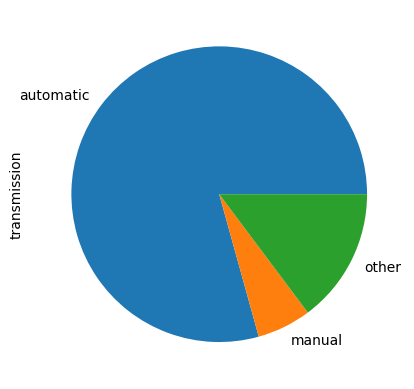

In [22]:
data.groupby(['transmission'])['transmission'].count().plot.pie()

<AxesSubplot:ylabel='fuel'>

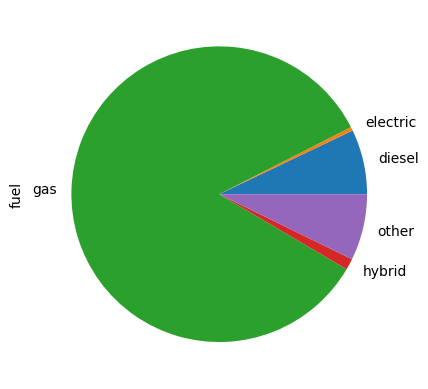

In [23]:
data.groupby(['fuel'])['fuel'].count().plot.pie()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [24]:
data_reduced_features = data[['price', 'year', 'condition', 'odometer', 'title_status', 'drive', 'type']]
data_reduced_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   condition     252776 non-null  object 
 3   odometer      422480 non-null  float64
 4   title_status  418638 non-null  object 
 5   drive         296313 non-null  object 
 6   type          334022 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 22.8+ MB


In [25]:
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [26]:
### Let us drop null values:  
data_no_nulls = data_reduced_features.dropna()

In [27]:
data_no_nulls.isna().sum()

price           0
year            0
condition       0
odometer        0
title_status    0
drive           0
type            0
dtype: int64

In [28]:
data_no_nulls[['price','year','odometer']].corr()

,price,year,odometer
price,1.000000,-0.001343,0.001083
year,-0.001343,1.000000,-0.151194
odometer,0.001083,-0.151194,1.000000


KeyboardInterrupt: 

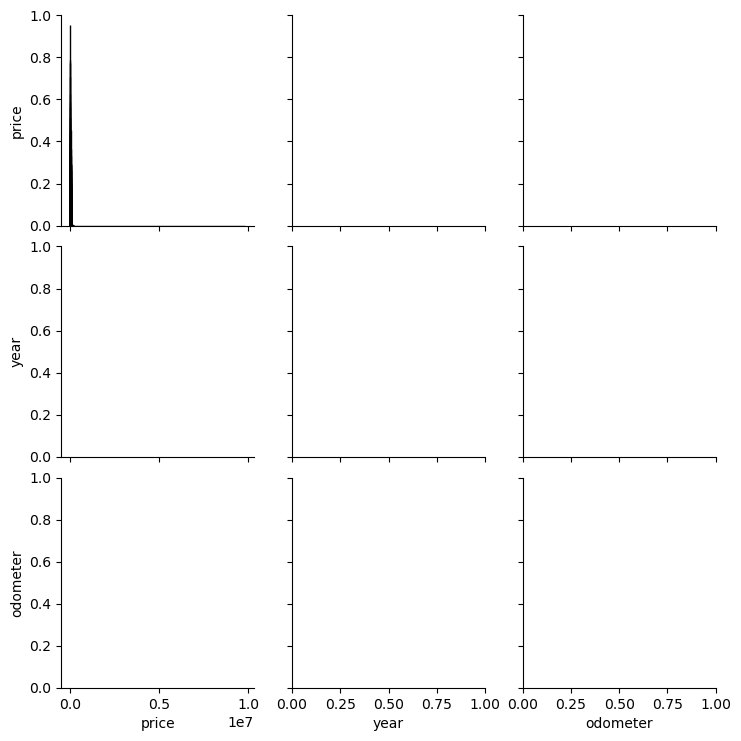

In [29]:
# sns.pairplot(data_no_nulls[['price','year','odometer']])

In [30]:
X = data_no_nulls.drop('price', axis=1)
y = data_no_nulls['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=22)

In [32]:
X_train.head()

,year,condition,odometer,title_status,drive,type
336556,2001.0,like new,50000.0,clean,rwd,coupe
281465,2009.0,good,192335.0,clean,4wd,sedan
383939,2014.0,like new,197746.0,clean,4wd,truck
249323,2014.0,good,82170.0,clean,4wd,other
272668,2008.0,like new,60000.0,clean,fwd,sedan


In [33]:
y_train.head()

336556    10900
281465     4300
383939    16000
249323    19695
272668     7999
Name: price, dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [34]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [35]:
X_train.head()

,year,condition,odometer,title_status,drive,type
336556,2001.0,like new,50000.0,clean,rwd,coupe
281465,2009.0,good,192335.0,clean,4wd,sedan
383939,2014.0,like new,197746.0,clean,4wd,truck
249323,2014.0,good,82170.0,clean,4wd,other
272668,2008.0,like new,60000.0,clean,fwd,sedan


In [36]:
### Let us prepare our transformer: 
### a. OneHotEncoder to encode features: 'drive' and 'type'
### b. OrdinalEncoder to encode 'title_status' and 'condition' features

transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), ['drive','type']),
    (OrdinalEncoder(categories = [['clean', 'rebuilt', 'lien', 'parts only', 'missing', 'salvage']]), ['title_status']),
    (OrdinalEncoder(categories = [['new', 'like new', 'excellent', 'good', 'fair', 'salvage']]), ['condition']),
    remainder='passthrough')
transformer.fit_transform(X_train)[:5]

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00100e+03, 5.00000e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 2.00900e+03, 1.92335e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 2.01400e+03, 1.97746e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0

In [38]:
pipe_01 = Pipeline([
    ('col_transformer', transformer), 
    ('Scaler',StandardScaler()),
    ('linreg', LinearRegression(fit_intercept=False))])


In [39]:
pipe_01.fit(X_train, y_train)
X_predict_01 = pipe_01.predict(X_train)
mse_01 = mean_squared_error(X_predict_01, y_train)
mse_01

128605636398863.52

In [40]:
X_train.head()

,year,condition,odometer,title_status,drive,type
336556,2001.0,like new,50000.0,clean,rwd,coupe
281465,2009.0,good,192335.0,clean,4wd,sedan
383939,2014.0,like new,197746.0,clean,4wd,truck
249323,2014.0,good,82170.0,clean,4wd,other
272668,2008.0,like new,60000.0,clean,fwd,sedan


In [41]:
### Now, let's try a polynomial 2 features model
pipe_poly_2 = Pipeline([
    ('col_transformer', transformer), 
    ('Scaler',StandardScaler()),
    ('quad_features', PolynomialFeatures(degree=2)),
    ('linreg', LinearRegression(fit_intercept=False))])
pipe_poly_2.fit(X_train, y_train)
X_predict_poly_2 = pipe_poly_2.predict(X_train)
mse_poly_2 = mean_squared_error(X_predict_poly_2, y_train)
mse_poly_2

128587502554542.45

In [42]:
#pipe_poly_2['quad_features'].get_feature_names_out()
#pipe_poly_2['linreg'].coef_
poly_2_df = pd.DataFrame(pipe_poly_2['quad_features'].get_feature_names_out(), pipe_poly_2['linreg'].coef_)
poly_2_df.reset_index()

,index,0
0,2.268472e+12,1
1,2.824604e+15,x0
2,1.632493e+15,x1
3,2.494855e+14,x2
4,-1.090128e+15,x3
...,...,...
226,4.932652e+03,x17 x18
227,-8.253607e+03,x17 x19
228,-1.148838e+04,x18^2
229,1.124945e+03,x18 x19


In [43]:
pipe_poly_2['quad_features'].get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5',
       'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12',
       'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x0 x17', 'x0 x18',
       'x0 x19', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6',
       'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13',
       'x1 x14', 'x1 x15', 'x1 x16', 'x1 x17', 'x1 x18', 'x1 x19', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9',
       'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x2 x15',
       'x2 x16', 'x2 x17', 'x2 x18', 'x2 x19', 'x3^2', 'x3 x4', 'x3 x5',
       'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12',
       'x3 x13', 'x3 x14', 'x3 x15', 'x3 x16', 'x3 x17', 'x3 x18',
       'x3 x19', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9',
       'x4 x

In [44]:
### Now, let's try a polynomial 3 features model
pipe_poly_3 = Pipeline([
    ('col_transformer', transformer), 
    ('Scaler',StandardScaler()),
    ('quad_features', PolynomialFeatures(degree=3)),
    ('linreg', LinearRegression(fit_intercept=False))])
pipe_poly_3.fit(X_train, y_train)
X_predict_poly_3 = pipe_poly_3.predict(X_train)
mse_poly_3 = mean_squared_error(X_predict_poly_3, y_train)
mse_poly_3

128508318809798.25

In [ ]:
### *** This step will take ~ 10-15 minutes to complete ***
train_mses = []
test_mses = []

for complexity in range(1,5):
    pipe = Pipeline([
        ('col_transformer', transformer), 
        ('Scaler',StandardScaler()),
        ('quad_features', PolynomialFeatures(degree=complexity)),
        ('linreg', LinearRegression(fit_intercept=False))
    ])
    pipe.fit(X_train, y_train)
    pred_train = pipe.predict(X_train)
    pred_test = pipe.predict(X_test)
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
pd.DataFrame({
    'Training MSEs': train_mses,
    'Testing MSEs': test_mses
})

In [ ]:

# LEt us plot the graph of train MSE vs. Test MSE
plt.plot(range(1, 5), train_mses, '--o', label = 'training error')
plt.plot(range(1, 5), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 5), range(1, 5))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

In [ ]:
#LEts find minimum test MSE
test_mses.index(min(test_mses)) + 1

#### So, we know that complexity of 1 would yeild us the best model. Let us proceed with that

In [ ]:
# Now, lets use Permutation feature importance to figure out which column would have the best correlation

In [46]:
pipe = Pipeline([
        ('col_transformer', transformer), 
        ('Scaler',StandardScaler()),
        ('quad_features', PolynomialFeatures(degree=1)),
        ('linreg', LinearRegression(fit_intercept=False))
    ])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

-0.061091473669685925

In [47]:
from sklearn.inspection import permutation_importance
r = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

condition                0.003 +/- 0.000
drive                    0.000 +/- 0.000


In [61]:
r.importances_mean.argsort()

array([2, 3, 0, 4, 1, 5], dtype=int64)

In [48]:
#Now, let us run the premutation feature importance for all 3 score types: 
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_test.columns[i]:<25}"
                  f"{r.importances_mean[i]:.3f}" 
                  f" +/- {r.importances_std[i]:.3f}")

r2
    condition                0.003 +/- 0.000
    drive                    0.000 +/- 0.000
neg_mean_absolute_percentage_error
    type                     2112637422302344448.000 +/- 464618335727873856.000
    year                     899353786953182848.000 +/- 66900871571669264.000
    drive                    68169220132921960.000 +/- 4516511109953212.000
neg_mean_squared_error
    condition                767908024.417 +/- 122003605.474
    drive                    145060369.953 +/- 8389786.434


In [ ]:
## From the above, we can infer that condition of a vehicle followed by the drive type seems to have the most positive bearing on the sale price 

In [50]:
### Now, let us try some Ridge cross validation with 20 different alphas
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn import set_config

In [51]:
alphas = np.logspace(-10,10, 21)
alphas

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [56]:
set_config(display="diagram")

In [57]:
model_ridge_with_regularization = make_pipeline(
    transformer,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas)
    )
)
model_ridge_with_regularization.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['drive', 'type']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['clean',
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'parts '
                                                                              'only',
                                                                              'missing',
                                                                              'salvage']]),
                                                  ['title_status']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['new',
                                                                              'like '
                                                                              'new',
                                                                              'excellent',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))))])

In [ ]:
#Get the feature names out
feature_names = get_feature_names(transformer)
mapping = { 
    'onehotencoder__x0':'drive', 
    'onehotencoder__x1':'type', 
    'ordinalencoder-1__':'', 
    'ordinalencoder-2__':'', 
    'x0':'year', 
    'x2':'odometer'
}

for i in range(0,len(feature_names)): 
    for k, v in mapping.items():
        feature_names[i] = feature_names[i].replace(k, v)
        

In [87]:

coefs = pd.DataFrame(
    model_ridge_with_regularization[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names
)
coefs

,Coefficients
drive_4wd,13319.063832
drive_fwd,-11123.473028
drive_rwd,-2195.590804
type_SUV,-11758.213864
type_bus,-114.941446
type_convertible,-1921.222189
type_coupe,-3506.323502
type_hatchback,-2253.561212
type_mini-van,-1148.304632
type_offroad,-334.928307


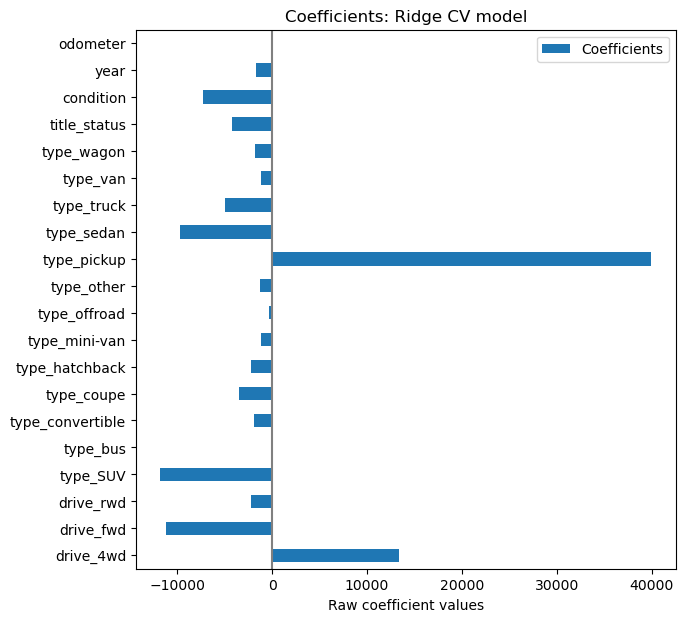

In [88]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Coefficients: Ridge CV model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)
plt.show()

In [ ]:
### From the above graph, we notice the following: 
# a. Odometer reading has a higher bearing on price than year
# b. The worse the condition, the lesser the price of the vehicle (Condition used ordinalencoder with descending values
# c. pickup trucks seem to have the best resale value                                                           

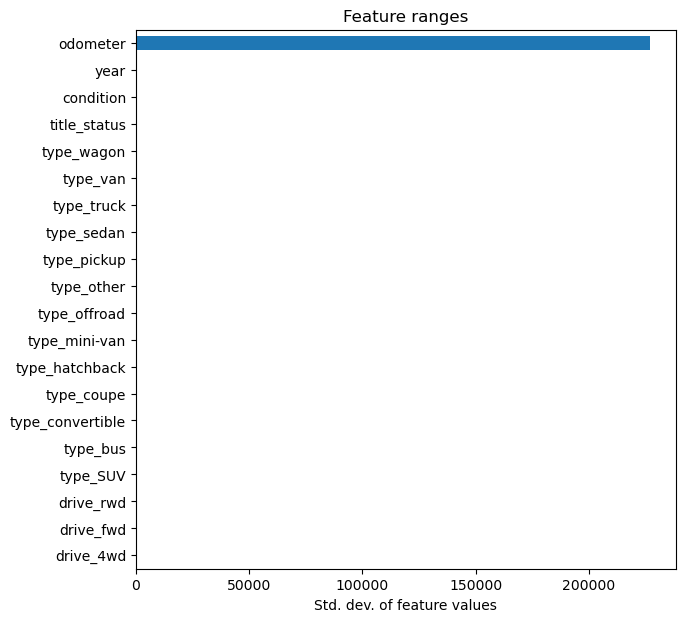

In [90]:
## Lets look at the coefficient std. dev
X_train_preprocessed = pd.DataFrame(
    model_ridge_with_regularization[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)
plt.show()

In [ ]:
### We can see that our model has not fit for the odometer feature efficiently

In [ ]:
### Let us now try the same with Lasso

In [91]:
from sklearn.linear_model import LassoCV

model_lasso = make_pipeline(
    transformer,
    TransformedTargetRegressor(
        regressor = LassoCV(alphas=alphas, max_iter=100_000)
    )
)
model_lasso.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.41610580366836e+17, tolerance: 128427083950907.47
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.609276198670544e+18, tolerance: 1523017726264510.2
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.601514086776596e+18, tolerance: 1524852070836580.8
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['drive', 'type']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['clean',
                                                                              'rebuilt',
                                                                              'lien',
                                                                              'parts '
                                                                              'only',
                                                                              'missing',
                                                                              'salvage']]),
                                                  ['title_status']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['new',
                                                                              'like '
                                                                              'new',
                                                                              'excellent',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage']]),
                                                  ['condition'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=LassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                                                              max_iter=100000)))])

In [92]:
model_lasso[-1].regressor_.alpha_

100000000.0

In [93]:
mse_train = mean_squared_error(y_train, model_lasso.predict(X_train))
mse_test = mean_squared_error(y_test, model_lasso.predict(X_test))


print(f'MSE Train (Lasso CV): {mse_train}')
print(f'MSE Test (Lasso CV): {mse_test}')

MSE Train (Lasso CV): 128618568897458.52
MSE Test (Lasso CV): 301883719817.73785


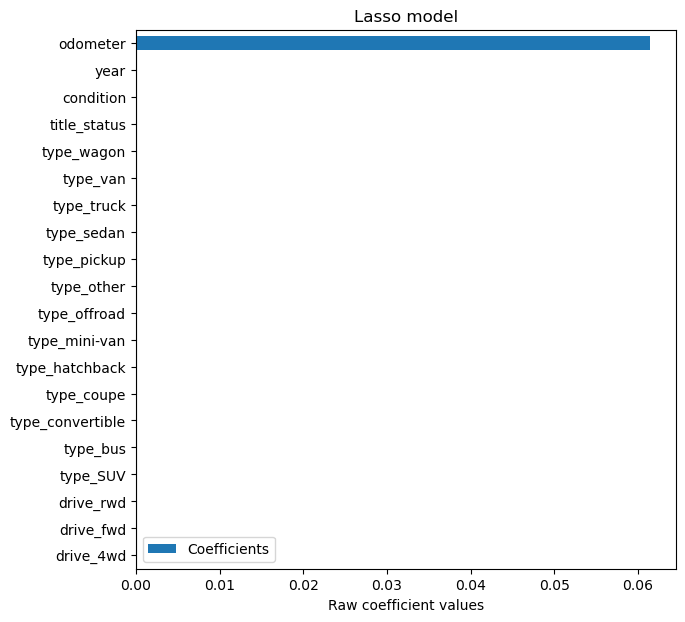

In [94]:
lasso_coefs = pd.DataFrame(
    model_lasso[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names
)

lasso_coefs.plot.barh(figsize=(9, 7))
plt.title("Lasso model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)
plt.show()

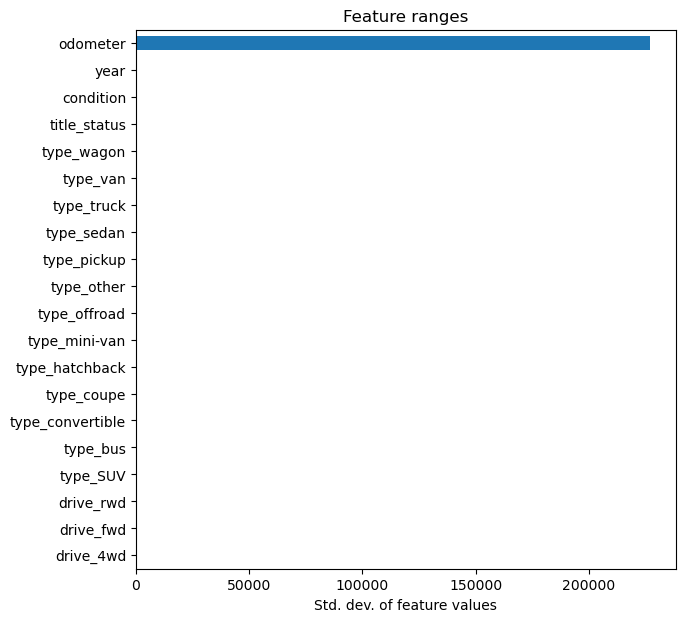

In [95]:
## Lets look at the coefficient std. dev
X_train_preprocessed_lasso = pd.DataFrame(
    model_lasso[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed_lasso.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)
plt.show()

In [ ]:
### Lasso does not seem to be a good fit for us since the only feature it seems to prefer is odometer, 
### but the std. dev. for that is also too high. 

In [62]:
import warnings
import sklearn
import pandas as pd

In [63]:
### Function to extract column names since ORdinalEncoder does not provide the get_feature_names_out function
### Source: https://johaupt.github.io/blog/columnTransformer_feature_names.html
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.